## Outlet Concentration 

In [1]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

from obs_data import *

print(os.getcwd())

2016
/Users/DayTightChunks/Documents/PhD/Models/phd-model-master/Analysis


In [2]:
PC = False
analysis = True
short_sim = True
version = "model_v12"
folder = "1"

timestamp = 'julian'

In [3]:
if analysis:
    dot = ''
else:
    dot = '..\\'
    
if PC:
    back = "\\"  
    sim_path = dot + version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

model_v12/


## Observed

In [4]:
obs = getOutletData("Conc_ugL", 'ugL', tss=True)
delta_obs = getOutletData("Delta_out", 'd13C', tss=True)

# Convert to NaN (if: 1e+09)
obs.loc[obs.ugL < 0,'ugL'] = np.nan
delta_obs.loc[delta_obs.d13C > 0,'d13C'] = np.nan

In [5]:
if short_sim:
    s_obs = 166 - 1
    e_obs = 300
else:
    # Julian days
    s_obs = 0
    e_obs = 300

# Calendar days
if timestamp == 'julian':
    # Julian days
    x = obs.Jdays.tolist()[s_obs:e_obs]
else:
    # Calendar days
    dates = getTime(sep=";")
    x = dates.Date.tolist()[s_obs:e_obs]
    # dates = getTime(sep=";")
    # x = dates.Date.tolist()[s:e]

In [6]:
# Observed 'Conc (mu/L)'
# conc_obs[s_obs:(s_obs+20)]
qObs = obs.ugL.tolist()[s_obs:e_obs]

trace = go.Scatter(
        x = x,
        y = qObs,
        mode = 'lines',
        name = r'$Conc.~(\mu g/L)$',
        line = dict(
            color = 'green',
            width = 3,
            dash = 'dash')
)

## Simulated

In [7]:
tss = ["oCONC_ugL"]  # Concentration ug/L
    
names = [r'$Conc. Sim.~(\mu g/L)$']
palette = ['blue', 'purple', 'rgb(178,223,138)', '#F44336', '#3F51B5']

col = "sim"
data = []
data.append(trace)  # Append observed 
for i in range(len(tss)):  # Append simulated components
    filename = "resM_" + tss[i] + ".tss"
    sim_pd = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)
    
    sim = sim_pd.sim.tolist()
    trace = go.Scatter(
        x = x,
        y = sim,
        mode = 'lines',
        name = names[i],
        line = dict(
            color = palette[i],
            width = 3,
            dash = 'dot')
    )
    data.append(trace)


layout = go.Layout(
    title='Outlet',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title=r'$Conc~(\mu g/L)$',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

In [8]:
figname = "ConcOutlet.png"

%matplotlib inline
import plotlycred

newtab = True
online = False
if online:
    #fig = py.iplot(data) 
    fig = go.Figure(data=data, layout=layout)
    py.image.save_as(fig, filename=figname)
    # py.plot(fig, filename=figname) # Opens in web
else:
    fig = go.Figure(data=data, layout=layout)
    if newtab:
        plot(fig)
    else:
        iplot(fig)

### Q Components $(m^3/d)$

Follow this link to interact with the data:

https://plot.ly/~DayTimeChunks/15/


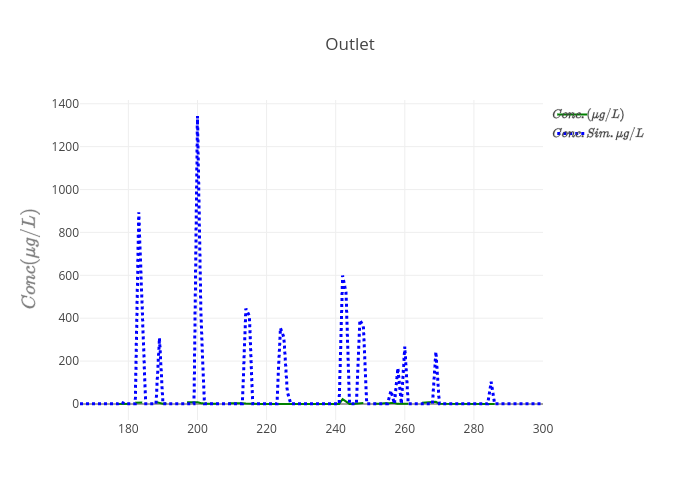

In [11]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)

## Nash

In [ ]:
start = 1
n_tests = 1
for i in range(start, n_tests+1):
    folder = str(i)
    col = 'Nash.c' + str(i)
    nash = pd.read_table(sim_path + folder + back + "resNash_q_m3.tss", skiprows=4, delim_whitespace=True,
                         names=['Jdays', col],
                         header=None)
    if i == 1:
        nash_all = nash
    else:
        nash_all = nash_all.merge(nash, left_on='Jdays', right_on='Jdays', how='outer')

if short_sim:
    ndata = nash_all[11:] # [10:] (v1)
else:
     ndata = nash_all[176:] 

In [ ]:
ndata.head()

In [ ]:
nash = ndata['Nash.c1'].tolist()
x = ndata['Jdays'].tolist()

In [ ]:
traceN = go.Scatter(
    x = x,
    y = nash,
    mode = 'lines',
    name = 'Nash.',
    line = dict(
        color = '#F44336',
        width = 3,
        dash = 'dot')
)
n = [traceN]
nfigname = "Nash.png"

%matplotlib inline
import plotlycred

online = False
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=n)#, layout=layout)
    py.image.save_as(fig, filename=nfigname)
    # py.plot(fig, filename=figname) # Opens in web
else:
    fig = go.Figure(data=n)#, layout=layout)
    iplot(fig)